# Machine Learning Model with <span style = 'color: orange;'>Scikit</span> - <span style = 'color: DodgerBlue;'>Learn</span>
<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/1200px-Scikit_learn_logo_small.svg.png" alt="image" width="300"/></center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

<h3>Import Data Set</h3>

In [2]:
# Data Set reference from url: "kaggle.com/datasets/bumba5341/advertisingcsv/data"
url_dataset = 'https://raw.githubusercontent.com/panyakorn5058/Prediction_Data_using_Linear_Regression_Model/main/Advertising.csv'
df_Ad = pd.read_csv(url_dataset)
df_Ad.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,57,7.3,28.1,41.4,5.5
1,127,7.8,38.9,50.6,6.6
2,133,8.4,27.2,2.1,5.7
3,6,8.7,48.9,75.0,7.2
4,159,11.7,36.9,45.2,7.3


In [3]:
df_Ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  194 non-null    int64  
 1   TV          194 non-null    float64
 2   Radio       194 non-null    float64
 3   Newspaper   194 non-null    float64
 4   Sales       194 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.7 KB


In [4]:
df_Ad.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [5]:
df_Ad.drop('Unnamed: 0', axis=1, inplace=True)

<Axes: >

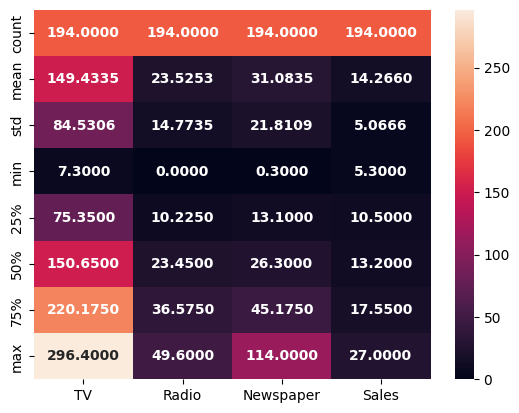

In [6]:
sns.heatmap(df_Ad.describe(), annot=True, fmt=".4f", annot_kws={'weight': 'bold'})

<h4> Calculate <code>Correlation Coefficient (Pearson's)</code> for display relation of data</h4>
<h2>$$r = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2 \sum_{i=1}^{n}(y_i - \bar{y})^2}}$$</h2>
<h4>or use function<code>dataframe.corr()</code></h4>

<Axes: >

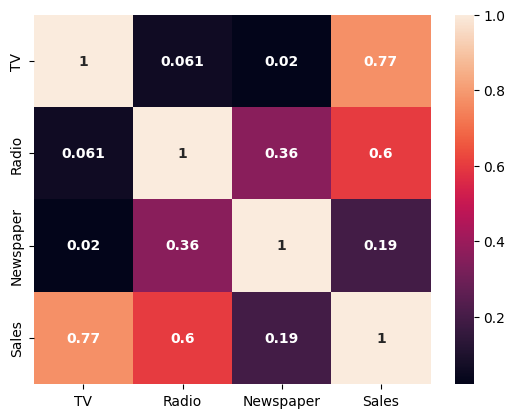

In [7]:
sns.heatmap(df_Ad.corr(), annot=True, annot_kws={'weight': 'bold'})

<h4>Scatter Plot</h4>

In [8]:
# Plotly
go.Figure(go.Scatter(x=df_Ad.TV, y=df_Ad.Sales, mode='markers', name='Data'))

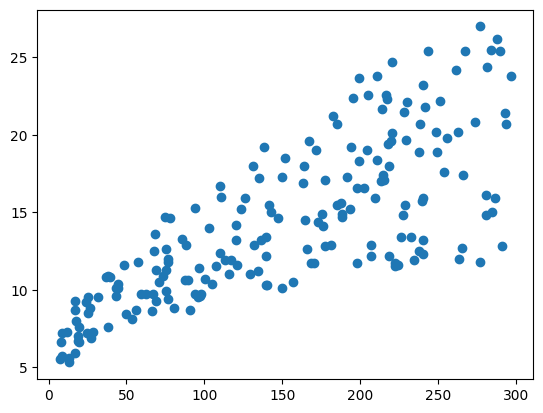

In [9]:
# Matplotlib
plt.scatter(df_Ad.TV, df_Ad.Sales)

<h3>Preprocess Data</h3>

In [10]:
X = df_Ad[['TV']].values
y = df_Ad[['Sales']].values

In [11]:
print(f'X shape: {X.shape} \ny shape: {y.shape}')

X shape: (194, 1) 
y shape: (194, 1)


<h3>Data Spliting <code>Train Test Split</code></h3>

In [12]:
# Train Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # 58 699199

In [13]:
print(f"X_train shape = {X_train.shape} \ny_train shape = {y_train.shape} \n------------------")
print(f"X_test shape = {X_test.shape} \ny_test shape = {y_test.shape}")

X_train shape = (145, 1) 
y_train shape = (145, 1) 
------------------
X_test shape = (49, 1) 
y_test shape = (49, 1)


<h3><h3>SSE (Sum of Squares Error) using $mean(y)$ prediction</h3></h3>
<h2>$$SSE=\sum_{i=0}^n(y_i - \bar{y})^2$$</h2>

In [14]:
SSE = np.sum((y_train - y.mean()) ** 2)

scientific_notation = "{:e}".format(SSE)
print(f"SSE = {SSE}, {scientific_notation}")

SSE = 3711.5377202678287, 3.711538e+03


<h3>Build Model <code>LinearRegression()</code> and Training</h3>

In [15]:
model_Adspen = linear_model.LinearRegression()
model_Adspen.fit(X_train, y_train) # Training Data

LinearRegression()

In [16]:
# Intercept and Slope (coefficient)
intercept, slope = model_Adspen.intercept_[0], model_Adspen.coef_[0, 0]
print(f"Intercept = {intercept}, Slope = {slope}")

Intercept = 7.443040536235974, Slope = 0.044666397038157765


<h3>Scatter Plot with Regression Line</h3>

In [17]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = X_train[:, 0], y = y_train[:, 0], mode = 'markers', name = 'Data Point'))
fig.add_trace(go.Scatter(x = X_train[:, 0], y = intercept + slope * X_train[:, 0], mode = 'lines', name = 'Linear Regression'))
fig.update_layout(
    xaxis_title="TV (Ad Spending)",
    yaxis_title="Sales"
)

<h3>SSE (Sum of Squares Error) Calculation after training model <code>LinearRegression()</code></h3>
<h2>$$SSE=\sum_{i=0}^n(y_i - \hat{y_i})^2$$</h2>

In [18]:
# SSE after estimate Intercept and Slope
y_pred_train_set = intercept + slope * X_train

SSE = np.sum((y_train - y_pred_train_set)**2)

scientific_notation = "{:e}".format(SSE)
print(f"SSE = {SSE}, {scientific_notation}")

SSE = 1587.528486496084, 1.587528e+03


<h3>R-Squared</h3>

In [19]:
# R-Squared
r2 = r2_score(y_test, model_Adspen.predict(X_test))
print(f'R-squared: {r2}')

R-squared: 0.6741936988664301


<h3>Prediction</h3>

In [20]:
# Prediction
y_pred = model_Adspen.predict(X_test)
data_dict = {
    "X_test": X_test[:, 0],
    "Predict Value": y_pred[:, 0]
}
pd.DataFrame(data_dict).head()

,X_test,Predict Value
0,215.4,17.064182
1,25.0,8.559700
2,230.1,17.720778
3,149.8,14.134067
4,104.6,12.115146


In [ ]:
# install module "gradio"
!pip install gradio

In [22]:
import gradio as gr

def prediction(X):
    y_pred = model_Adspen.predict(np.array([[X]]))[0, 0]
    return round(y_pred, 4)

demo = gr.Interface(
    fn=prediction,
    inputs=["number"],
    outputs=["text"],
)

demo.launch()

Running on local URL:  http://127.0.0.1:7866

To create a public link, set `share=True` in `launch()`.
